In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D

---
# Finding eigenvalues
---

[-1.  6.]


/home/shubham/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


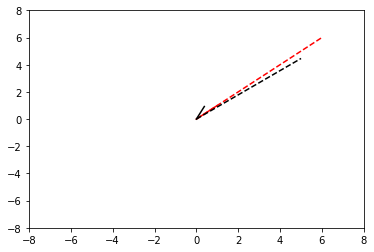

In [2]:
# matrix
A = [[1,5], [2,4]]

# extract the eigenvalues
eigvals = np.linalg.eig(A)

# note that the eigenvalues are in the first element of eigvals:
print(eigvals[0])


# specify two vectors
v1 = np.array([1,1])         # is an eigenvector!
v2 = np.random.randn(2,1)    # unlikely to be an eigenvector
v2 = v2/np.linalg.norm(v2)   # unit length for convenience

# compute Av
Av1 = A@v1
Av2 = A@v2


# plot the vectors and Av
plt.plot([0,v1[0]] ,[0,v1[1]],'r')
plt.plot([0,Av1[0]],[0,Av1[1]],'r--')
plt.plot([0,v2[0]] ,[0,v2[1]],'k')
plt.plot([0,Av2[0]],[0,Av2[1]],'k--')

plt.axis([-8,8,-8,8])
plt.show()

In [3]:
# confirm eigenvalues for a 3x3 matrix

# specify matrix
A = [ [-2,  2, -3 ],
      [-4,  1, -6 ],
      [-1, -2,  0 ]  ]

# get eigenvalues
evals = np.linalg.eig(A)
print(evals[0])


[-3. -1.  3.]


In [4]:
# Code Practice 1: Eigenvalues of diagonal and triangular matrices

# generate diagonal matrix(2x2), compute eigenvalues
A = np.diag([2, 1])
print("Diagonal Matrix A: \n", A)
print("Eigenvalues of A: ", np.linalg.eig(A)[0])
print()

Diagonal Matrix A: 
 [[2 0]
 [0 1]]
Eigenvalues of A:  [2. 1.]



In [5]:
# expand to NxN diagonal matrix
A = np.diag(np.arange(3, 18))
print("Large Diagonal matrix A: \n", A)
print()
print("Eigenvalues of A: \n", np.linalg.eig(A)[0])
print()

Large Diagonal matrix A: 
 [[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]

Eigenvalues of A: 
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]



In [6]:
# triangular matrices (upper and lower)
A = np.triu(np.random.randn(4, 4))
print("Upper trinagular Matrix: \n", A)
print()
print("Eigenvalues of upper triangular matrix: \n", np.linalg.eig(A)[0])
print()

A = np.tril(np.random.randn(4, 4))
print("Lower trinagular Matrix: \n", A)
print()
print("Eigenvalues of lower triangular matrix: \n", np.linalg.eig(A)[0])

Upper trinagular Matrix: 
 [[-0.20194024  0.78783138 -1.69098527 -1.60145754]
 [ 0.          0.76092684 -0.53977319 -0.29329643]
 [ 0.          0.         -1.36977936  0.73386954]
 [ 0.          0.          0.         -0.53580091]]

Eigenvalues of upper triangular matrix: 
 [-0.20194024  0.76092684 -1.36977936 -0.53580091]

Lower trinagular Matrix: 
 [[-1.54496984  0.          0.          0.        ]
 [ 0.40425655 -1.02654629  0.          0.        ]
 [ 0.24964554  0.61907322 -0.54205093  0.        ]
 [-0.92662003 -0.37909097 -0.62408987 -0.81207661]]

Eigenvalues of lower triangular matrix: 
 [-0.81207661 -0.54205093 -1.02654629 -1.54496984]


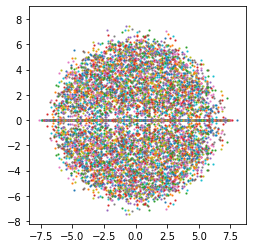

' conclusion: the negative part of imaginary part of eigenvalues are the mirror image of positive part of \nimaginary part of eigenvalues and there is a line which shows that there are some real eigen values also '

In [7]:
# Code Practice 2: Eigenvalues of random matrices

# generate large random matrices, extract eigenvalues, plot
# repeat this lots of times for lots of random matrices, put all the eigenvalues in the same plot

for i in range(200):
    A = np.random.randn(40,40)
    evals = np.linalg.eig(A)[0]
    plt.plot(np.real(evals), np.imag(evals), 's', markersize=1)

plt.axis('square')
plt.show()

""" conclusion: the negative part of imaginary part of eigenvalues are the mirror image of positive part of 
imaginary part of eigenvalues and there is a line which shows that there are some real eigen values also """

---
# Finding eigenvectors
---

In [8]:
# matrix
A = [[1,2], [2,1]]

# eigenvectors (compare with code above)
# note also the differences with MATLAB: different order, evals in vector
evals,evecs = np.linalg.eig(A)
print(evals), print(' ')
print(evecs)

[ 3. -1.]
 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


0.9999999999999999 0.9999999999999999


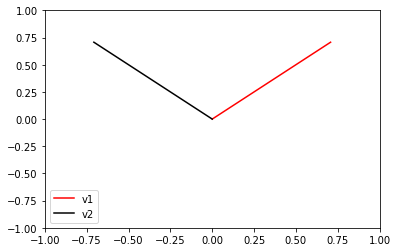

In [9]:
# compute the norm of each eigenvector
mag_v1 = np.sqrt( np.sum( np.square(evecs[:,0])) )
mag_v2 = np.sqrt( np.sum( np.square(evecs[:,1])) )
print(mag_v1,mag_v2)

# plot
plt.plot([0,evecs[0,0]],[0,evecs[1,0]],'r',label='v1')
plt.plot([0,evecs[0,1]],[0,evecs[1,1]],'k',label='v2')


plt.axis([-1,1,-1,1])
plt.legend()
plt.show()

---
# Diagonalization
---

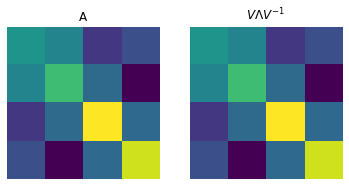

Reconstruction RMS: 1.78824088184294e-13


In [10]:
## eigendecomposition of A

# make a symmetric matrix
A = np.round(10*np.random.randn(4,4))
A = A.T@A

# eigendecomposition
evals,evecs = np.linalg.eig(A)

# test reconstruction
Ap = evecs @ np.diag(evals) @ np.linalg.inv(evecs)


# plot
plt.subplot(121)
plt.imshow(A)
plt.axis('off')
plt.title('A')

plt.subplot(122)
plt.imshow(Ap)
plt.axis('off')
plt.title('$V\Lambda V^{-1}$')

plt.show()

# subtract the two (should be zero with rounding errors)
recondiff = A-Ap

# reconstruction error (note the numerical inaccuracies)
rmsA = np.sqrt( np.mean(np.square( np.reshape(recondiff,(1,-1)) )) )

print('Reconstruction RMS:', rmsA)

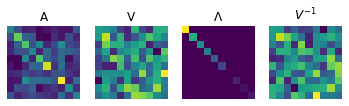

In [11]:
## diagonalization in images

# A matrix
A = np.random.randn(10,10)
A = A.T@A

# eigendecomposition
D,V = np.linalg.eig(A)

# show the results
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(V)
plt.title('V')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(D))
plt.title('$\Lambda$')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.linalg.inv(V))
plt.title('$V^{-1}$')
plt.axis('off')

plt.show()

---
# Matrix powers via diagonalization
---

In [12]:
## matrix powers

A = np.random.rand(2,2)

# compute matrix power directly
print(np.linalg.matrix_power(A,3)) # A@A@A
print(' ')

# and via eigendecomposition
D,V = np.linalg.eig(A)
D = np.diag(D)

# reproduce via diagonalization
print(V @ np.linalg.matrix_power(D,3) @ np.linalg.inv(V))

[[0.10628148 0.4062151 ]
 [0.07603124 0.29053728]]
 
[[0.10628148 0.4062151 ]
 [0.07603124 0.29053728]]


[[-0.39442646 -0.79260515 -0.46497832]
 [-0.84737188  0.50947455 -0.14965486]
 [-0.35551184 -0.33498172  0.87258156]]
 
[[-0.39442646 -0.79260515 -0.46497832]
 [-0.84737188  0.50947455 -0.14965486]
 [-0.35551184 -0.33498172  0.87258156]]


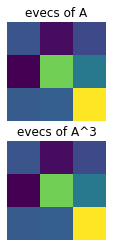

In [13]:
## eigenvalues of A and A^3

# create a symmetric matrix
A = np.random.rand(3,3)
A = A@A.T

D,V   = np.linalg.eig(A)
D3,V3 = np.linalg.eig(A@A@A)

print(V), print(' ')
print(V3)

plt.subplot(221)
plt.imshow(V)
plt.axis('off')
plt.title('evecs of A')

plt.subplot(223)
plt.imshow(V3)
plt.axis('off')
plt.title('evecs of A^3')

plt.show()

/tmp/ipykernel_33325/2331657486.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


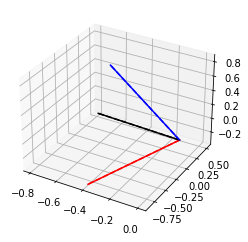

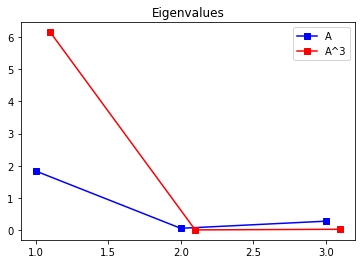

In [14]:
## plot the eigenvectors and eigenvalues

fig = plt.figure()
ax = fig.gca(projection='3d')

# plot eigenvectors of A
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r')
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k')
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b')

# plot eigenvectors of A^3
ax.plot([0,V3[0,0]],[0,V3[1,0]],[0,V3[2,0]],'r--')
ax.plot([0,V3[0,1]],[0,V3[1,1]],[0,V3[2,1]],'k--')
ax.plot([0,V3[0,2]],[0,V3[1,2]],[0,V3[2,2]],'b--')

plt.show()

## show the eigenvalues
plt.plot([1,2,3],D,'bs-',label='A')
plt.plot([1.1,2.1,3.1],D3,'rs-',label='A^3')
plt.title('Eigenvalues')
plt.legend()
plt.show()

In [15]:
print(D), print(' ')
print(D3), print(' ')
print(D**3)

[1.83253723 0.05019587 0.27165595]
 
[6.15401315e+00 1.26474814e-04 2.00473817e-02]
 
[6.15401315e+00 1.26474814e-04 2.00473817e-02]


In [16]:
# Code Practice 3: Eigendecomposition of matrix differences

# create two random symmetric matrices (as symmetric matrices always have real valued eigenvalues)
A = np.random.randn(5, 5);
A = A.T@A
B = np.random.randn(5, 5);
B = B@B.T     # B'B != BB' but they both are symmetric


# Eigendecomposition of A-B
D1, V1 = np.linalg.eig(A-B)
D2, V2 = np.linalg.eig(A@A - A@B - B@A + B@B)

print(np.round(D1, 3))
print()
print(np.round(D2, 3))
print()
print(np.round(D1**2, 3))
print()

# sorting eigenvalues
sidx1 = np.argsort(abs(D1))
sidx2 = np.argsort(D2)
print(sidx1)
print()


# now for actual sorting
D1 = D1[sidx1]
D2 = D2[sidx2]
print(D1**2)
print(D2)
print()

V1 = V1[:, sidx1]
V2 = V1[:, sidx2]

print(np.round(V1-V2, 3))   # the result may be not all zeros due to sign flip in V1 and V2
print()

print(np.round(V1, 2))
print()
print(np.round(V2, 2))

[-6.911  7.234  4.721  1.4   -3.02 ]

[52.337 47.762 22.291  1.959  9.12 ]

[47.762 52.337 22.291  1.959  9.12 ]

[3 4 2 0 1]

[ 1.95869693  9.12005164 22.29124841 47.76177387 52.33674184]
[ 1.95869693  9.12005164 22.29124841 47.76177387 52.33674184]

[[-1.037  0.588  0.     0.433  0.016]
 [ 0.396 -0.218  0.    -0.37   0.192]
 [ 0.25  -0.337  0.     0.973 -0.886]
 [-0.786 -1.149  0.     0.85   1.085]
 [ 0.295 -0.417  0.     0.075  0.047]]

[[-0.42  0.19 -0.5   0.62 -0.4 ]
 [-0.25 -0.28 -0.66 -0.65 -0.06]
 [ 0.48 -0.74 -0.07  0.23 -0.4 ]
 [-0.5  -0.56  0.09  0.29  0.59]
 [ 0.53  0.16 -0.56  0.23  0.57]]

[[ 0.62 -0.4  -0.5   0.19 -0.42]
 [-0.65 -0.06 -0.66 -0.28 -0.25]
 [ 0.23 -0.4  -0.07 -0.74  0.48]
 [ 0.29  0.59  0.09 -0.56 -0.5 ]
 [ 0.23  0.57 -0.56  0.16  0.53]]


---
# Eigenvectors of repeated eigenvalues
---

In [17]:
# this code is copy-pasted with some light editing from:
# https://stackoverflow.com/questions/3461869/plot-a-plane-based-on-a-normal-vector-and-a-point-in-matlab-or-matplotlib

from matplotlib.patches import Circle, PathPatch
from matplotlib.transforms import Affine2D
from mpl_toolkits.mplot3d import art3d

def plot_vector(fig, orig, v, color='blue'):
   ax = fig.gca(projection='3d')
   orig = np.array(orig); v=np.array(v)
   ax.quiver(orig[0], orig[1], orig[2], v[0], v[1], v[2],color=color)
   ax.set_xlim(0,10);ax.set_ylim(0,10);ax.set_zlim(0,10)
   ax = fig.gca(projection='3d')  
   return fig

def rotation_matrix(d):
    sin_angle = np.linalg.norm(d)
    if sin_angle == 0:return np.identity(3)
    d /= sin_angle
    eye = np.eye(3)
    ddt = np.outer(d, d)
    skew = np.array([[    0,  d[2],  -d[1]],
                  [-d[2],     0,  d[0]],
                  [d[1], -d[0],    0]], dtype=np.float64)

    M = ddt + np.sqrt(1 - sin_angle**2) * (eye - ddt) + sin_angle * skew
    return M

def pathpatch_2d_to_3d(pathpatch, z, normal):
    if type(normal) is str: #Translate strings to normal vectors
        index = "xyz".index(normal)
        normal = np.roll((1.0,0,0), index)

    normal /= np.linalg.norm(normal) #Make sure the vector is normalised
    path = pathpatch.get_path() #Get the path and the associated transform
    trans = pathpatch.get_patch_transform()

    path = trans.transform_path(path) #Apply the transform

    pathpatch.__class__ = art3d.PathPatch3D #Change the class
    pathpatch._code3d = path.codes #Copy the codes
    pathpatch._facecolor3d = pathpatch.get_facecolor #Get the face color    

    verts = path.vertices #Get the vertices in 2D

    d = np.cross(normal, (0, 0, 1)) #Obtain the rotation vector    
    M = rotation_matrix(d) #Get the rotation matrix

    pathpatch._segment3d = np.array([np.dot(M, (x, y, 0)) + (0, 0, z) for x, y in verts])

def pathpatch_translate(pathpatch, delta):
    pathpatch._segment3d += delta

def plot_plane(ax, point, normal, size=10, color='g'):    
    p = Circle((0, 0), size, facecolor = color, alpha = .8)
    ax.add_patch(p)
    pathpatch_2d_to_3d(p, z=0, normal=normal)
    pathpatch_translate(p, (point[0], point[1], point[2]))


o = np.array([5,5,5])
v = np.array([3,3,3])
n = [0.5, 0.5, 0.5]

# from mpl_toolkits.mplot3d import Axes3D

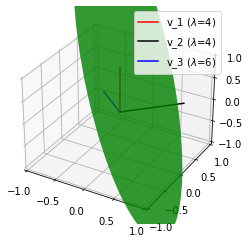

In [18]:
### Note about this cell: you need first to run the following cell,
#   then come back and run this one!

# a matrix
A = [ [ 5,  -1,  0], 
      [-1,   5,  0],
      [1/3,-1/3, 4] ]

# its eigendecomposition
D,V = np.linalg.eig(A)

# sort eigenvalues
i = np.argsort(D)
D = D[i]
V = V[:,i]


## plot eigenvectors
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# plot eigenvectors of A
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r',label='v_1 ($\lambda$=%g)' %D[0])
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k',label='v_2 ($\lambda$=%g)' %D[1])
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b',label='v_3 ($\lambda$=%g)' %D[2])
plt.legend()

# plot subspace spanned by same-eigenvalued eigenvectors
plot_plane(ax, V[:,0],V[:,1],size=3)
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()

---
# Eigendecomposition of symmetric matrices
---

In [19]:
# create a random matrix
A = np.random.randn(14,14)

# make it symmetric (additive method)
A = A+A.T

# diagonalize it
evals,evecs = np.linalg.eig(A)
print(evecs)
print()

# magnitudes of each vector
print("Magnitudes of each vector in eigenvectors matrix: \n", np.sqrt(sum(evecs**2)))

[[ 1.38183542e-01  1.67873910e-01  1.01772276e-01  3.45659642e-01
   1.22860026e-01  5.42376297e-01 -6.19129146e-01  6.48797787e-02
   9.57238752e-02  7.04079168e-02  2.39921360e-01 -2.30117428e-01
   3.60658698e-02  1.22957326e-02]
 [ 1.92793273e-01 -1.02007900e-01 -1.60837141e-01 -3.96370488e-02
  -7.79197685e-02  1.75673533e-01  2.24709771e-01  3.23503384e-01
  -3.33251741e-01  4.49567161e-01  1.10116446e-02 -1.31764651e-01
   6.14883839e-01 -1.55470864e-01]
 [ 9.07566688e-02  5.11230634e-01  2.02900953e-01  2.50739063e-01
  -3.65446949e-01 -1.52726615e-01  1.31923495e-01 -2.48911799e-01
  -4.87515464e-01  6.70350920e-02  2.81422822e-01  3.20965617e-02
  -4.07377735e-02  2.57052943e-01]
 [-1.30764800e-01 -1.14664527e-01  5.61130625e-02 -3.68543626e-01
  -3.30101799e-01  7.17840561e-02 -2.72522045e-01  1.26564780e-02
   1.15910796e-01 -8.49414243e-02 -8.03228129e-02  7.07681625e-02
   3.60258867e-01  6.93061496e-01]
 [ 2.19256196e-01  3.49061773e-01 -3.57234523e-01  1.24535295e-01
  

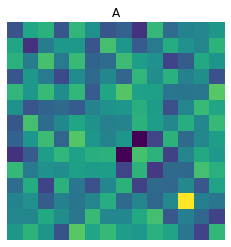

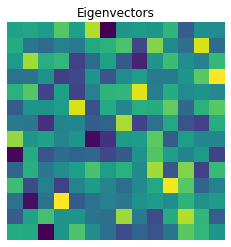

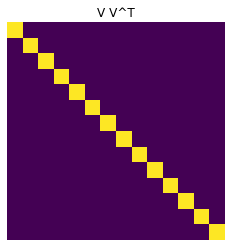

In [20]:
# and make plots
plt.imshow(A)
plt.axis('off')
plt.title('A')
plt.show()

plt.imshow(evecs)
plt.axis('off')
plt.title('Eigenvectors')
plt.show()

plt.imshow(evecs@evecs.T)
plt.axis('off')
plt.title('V V^T')
plt.show()

In [21]:
# Code Practice 4: nstruct a matrix from eigenlayers
# create a 5x5 symmetric matrix, take its eigendecomposition
m = 5
A = np.random.randn(m, m)
A = np.round(10*(A.T@A))

D, V = np.linalg.eig(A)

# convert column to vector
v = V[:, 2]
# print(v)
# print(np.reshape(V, (m,1)))

In [22]:
# show that the norm pf the outer product of v_i = 1
op = np.outer(v,v)
print(op)
print()

v = np.reshape(V[:, 2], (m,1))
print(v*v.T)     # another way outer product (after reshaping v(row) to v(column))
print()

print(np.linalg.norm(op))

[[ 0.03340811  0.01898127 -0.11963185 -0.03084862 -0.12910579]
 [ 0.01898127  0.01078447 -0.06797046 -0.01752706 -0.0733532 ]
 [-0.11963185 -0.06797046  0.42839236  0.11046651  0.46231778]
 [-0.03084862 -0.01752706  0.11046651  0.02848522  0.11921462]
 [-0.12910579 -0.0733532   0.46231778  0.11921462  0.49892985]]

[[ 0.03340811  0.01898127 -0.11963185 -0.03084862 -0.12910579]
 [ 0.01898127  0.01078447 -0.06797046 -0.01752706 -0.0733532 ]
 [-0.11963185 -0.06797046  0.42839236  0.11046651  0.46231778]
 [-0.03084862 -0.01752706  0.11046651  0.02848522  0.11921462]
 [-0.12910579 -0.0733532   0.46231778  0.11921462  0.49892985]]

1.0


In [23]:
# create one layer of A as lvv', compute its norm
print(np.linalg.norm(v*D[2]*v.T))
print(D[2])

18.33536920409597
18.335369204095965


In [24]:
# reconstruct A by summing over outer products

RecA = np.zeros((m,m))

for i in range(m):
    v = np.reshape(V[:, i], (m,1))
    RecA += v*D[i]*v.T
    print(np.linalg.matrix_rank(RecA))

print()
print("Matrix A: \n", A)
print()
print("Reconstructed Matrix A: \n", RecA)

1
2
3
4
5

Matrix A: 
 [[ 88. -17.  -2.  56.   4.]
 [-17.  73.  10. -11.  -3.]
 [ -2.  10.  53. -30. -24.]
 [ 56. -11. -30.  63.  30.]
 [  4.  -3. -24.  30.  34.]]

Reconstructed Matrix A: 
 [[ 88. -17.  -2.  56.   4.]
 [-17.  73.  10. -11.  -3.]
 [ -2.  10.  53. -30. -24.]
 [ 56. -11. -30.  63.  30.]
 [  4.  -3. -24.  30.  34.]]


In [25]:
# Code Practice 5: trace and determinant, eigenvalues sum and product
# trace(A) = sum(evals)
# det(A) = prod(evals)

A = np.random.randn(7,7)
A = A.T@A
# A = np.random.randn(7,5) @ np.random.randn(5,7)   # creating reduce matrix
tr = np.matrix.trace(A)
dt = np.linalg.det(A)


l = np.linalg.eig(A)[0]
# summing eigenvalues
tr1 = sum(l)
print([tr, tr1])

# multiplying the eigenvalues
dt1 = np.prod(l)
print([dt, dt1])

[45.19561540669035, 45.195615406690344]
[2806.881183848536, 2806.8811838485353]


---
# Generalized eigendecomposition
---

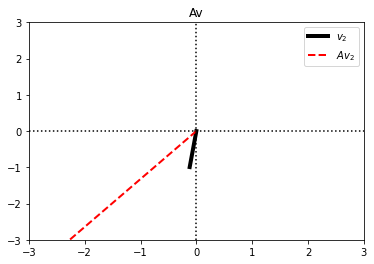

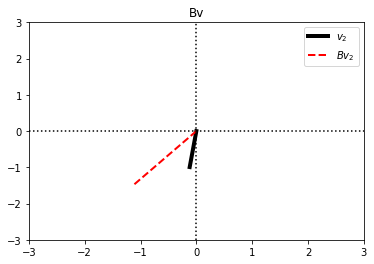

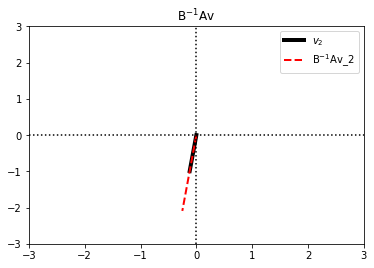

In [26]:
import scipy.linalg # kindof annoying, but numpy doesn't do GED

# define matrices
A = np.array([[3,2], [1,3]])
B = np.array([[1,1], [4,1]])

# GED
eigvals,eigvecs = scipy.linalg.eig(A,B)

# matrix-vector multiplication
Av = A@eigvecs[:,1]
Bv = B@eigvecs[:,1]
BinvAv = np.linalg.inv(B)@A@eigvecs[:,1]


plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,Av[0]],[0,Av[1]],'r--',linewidth=2,label='$Av_2$')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Av')
plt.show()

plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,Bv[0]],[0,Bv[1]],'r--',linewidth=2,label='$Bv_2$')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Bv')
plt.show()


plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,BinvAv[0]],[0,BinvAv[1]],'r--',linewidth=2,label='B$^{-1}$Av_2')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('B$^{-1}$Av')
plt.show()

[-1.68758746+0.j  1.18708385+0.j]
[-1.68758746+0.j  1.18708385+0.j]



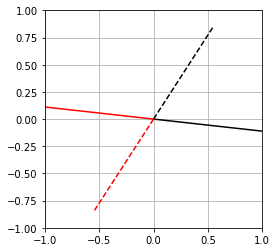

In [27]:
# Code Practice 5: GED on small and large matrices
""" compareeig(S, R) with eig(inv(R)*S)"""
# part-1: GED on 2x2 matrix, plot eignvectors
S = np.random.randn(2,2)
R = np.random.randn(2,2)

Ls, Ws = scipy.linalg.eig(S,R)
Li, Wi = scipy.linalg.eig(np.linalg.inv(R)@S)

print(Ls)
print(Li)
print()

# plot eigenvectors
plt.plot([0, Ws[0,0]], [0, Ws[1,0]], 'k')
plt.plot([0, Ws[0,1]], [0, Ws[1,1]], 'k--')
plt.plot([0, Wi[0,0]], [0, Wi[1,0]], 'r')
plt.plot([0, Wi[0,1]], [0, Wi[1,1]], 'r--')
                        
plt.axis('square')
plt.grid()
plt.axis([-1,1,-1,1])
plt.show()

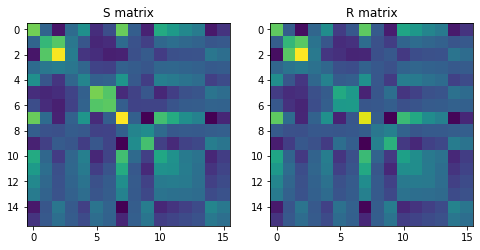

In [28]:
# part-2: with real data matrices, plot eigenvalues
from scipy.io import loadmat
data = loadmat('real_matrices.mat')

S = data['S']
R = data['R']

# lets have a look
fig,ax = plt.subplots(1,2,figsize=(8,5))
ax[0].imshow(S)
ax[0].set_title('S matrix')

ax[1].imshow(R)
ax[1].set_title('R matrix')

plt.show()

In [29]:
print(np.shape(R))
print(np.linalg.matrix_rank(R))

(16, 16)
14


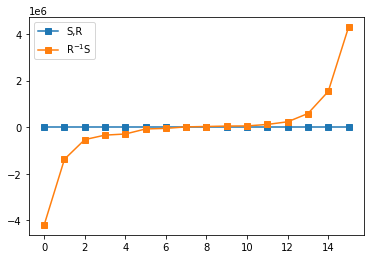

In [30]:
Ls, Ws = scipy.linalg.eigh(S,R)
Li, Wi = scipy.linalg.eigh(np.linalg.inv(R)@S)

plt.plot(Ls, 's-', label='S,R')
plt.plot(Li, 's-', label='R$^{-1}$S')
plt.legend()
# plt.ylim([0,3])
plt.show()